In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
X = pd.read_csv('mnistTrain.csv')
test = pd.read_csv('mnistTest.csv')

C:\Users\ankit\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

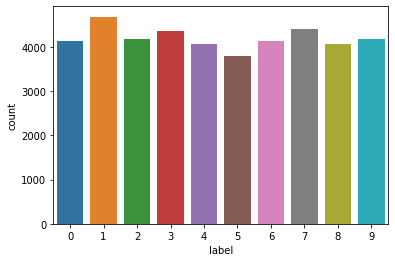

In [3]:
Y_train = X['label']
X_train = X.drop(labels = ['label'],axis = 1)

sns.countplot(Y_train)

In [4]:
#missing data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
#normalize

X_train = X_train / 255.0
test = test / 255.0

In [7]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
#encode the set**
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

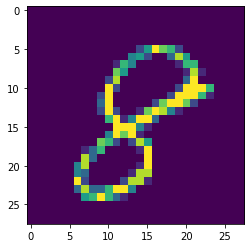

In [10]:
#show
plt.imshow(X_train[0][:,:,0])

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [12]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
classifier.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Flatten())
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation = "softmax"))

In [13]:
classifier.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [15]:
classifier.fit_generator(datagen.flow(X_train,Y_train, batch_size=86),
                              epochs = 30, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 86)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
439/439 - 7s - loss: 0.4164 - accuracy: 0.8654 - val_loss: 0.0664 - val_accuracy: 0.9776
Epoch 2/30
439/439 - 7s - loss: 0.1379 - accuracy: 0.9586 - val_loss: 0.0381 - val_accuracy: 0.9879
Epoch 3/30
439/439 - 7s - loss: 0.1006 - accuracy: 0.9695 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 4/30
439/439 - 7s - loss: 0.0852 - accuracy: 0.9747 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 5/30
439/439 - 7s - loss: 0.0749 - accuracy: 0.9781 - val_loss: 0.0329 - val_accuracy: 0.9895
Epoch 6/30
439/439 - 7s - loss: 0.0661 - accuracy: 0.9806 - val_loss: 0.0294 - val_accuracy: 0.9898
Epoch 7/30
439/439 - 7s - loss: 0.0628 - accuracy: 0.9811 - val_loss: 0.0244 - val_accuracy: 0.9924
Epoch 8/30
439/439 - 7s - loss: 0.0565 - accuracy: 0.9835 - val_loss: 0.0267 - val_accuracy: 0.9912
Epoch 9/30
439/439 - 7s - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0238 - val_accuracy: 0.9919
Epoch 10/30
439/439 - 7s

In [16]:
classifier.save("d1.h5")